<a href="https://colab.research.google.com/github/GeoDahm/GeoDahmApp/blob/aswin/comparson_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
pip install segment-geospatial groundingdino-py leafmap localtileserver


In [39]:
#pip install samgeo

ERROR: Could not find a version that satisfies the requirement samgeo (from versions: none)
ERROR: No matching distribution found for samgeo


In [40]:

import os
import leafmap
import samgeo
import torch
from samgeo import SamGeo, raster_to_vector, overlay_images
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM
import cv2



In [3]:
#url = 'https://drive.google.com/file/d/1jIIC5hvSPeJEC0fbDhtxVWk2XV9AxsQD/view?usp=sharing'

In [4]:
#leafmap.download_file(url, output='/content/drive/MyDrive/geodam main project/data set/comparison/input_data/Derna_sample.tif')

/content/drive/MyDrive/geodam main project/data set/comparison/input_data/Derna_sample.tif already exists. Skip downloading. Set overwrite=True to overwrite.


'/content/drive/MyDrive/geodam main project/data set/comparison/input_data/Derna_sample.tif'

In [36]:
input_images = "/content/drive/MyDrive/geodam main project/data set/comparison/input_data/Derna_sample.tif"

In [23]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 80,
}

In [24]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)

In [43]:
#sam = LangSAM()

In [44]:
sam.generate(input_images, output="mask.tif", foreground=True)

In [7]:
raster_to_vector('mask.tif', output='mask.shp')

In [8]:
# Load the segmentation mask
segmentation_mask = cv2.imread('mask.tif', cv2.IMREAD_GRAYSCALE)

# Find contours in the segmentation mask
contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the number of objects (contours)
num_objects = len(contours)
print("Number of objects detected:", num_objects)

Number of objects detected: 81


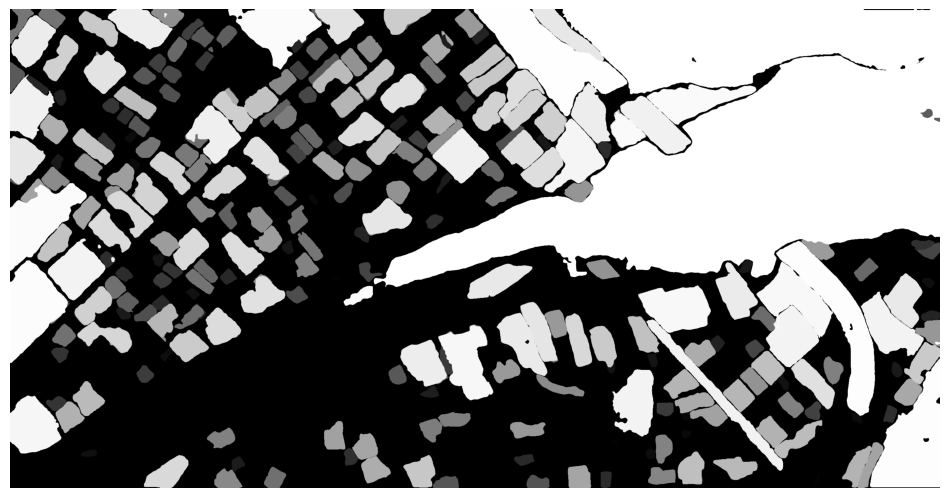

In [10]:
sam.show_masks(cmap="binary_r", box_color='red',
    title='Automatic Segmentation of Trees',
    blend=True,)

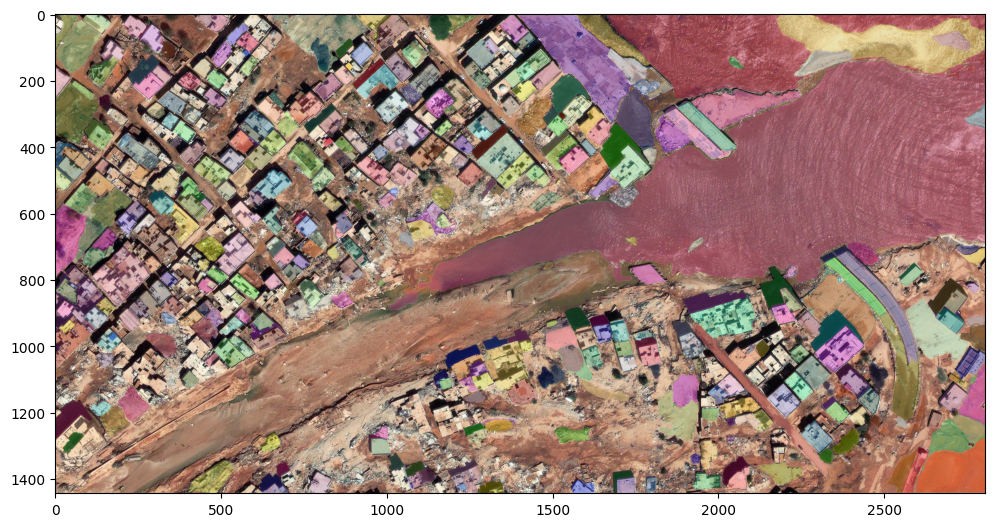

In [14]:
sam.show_anns(axis="on", opacity=10, output="annotation.tif" ,box_color='red',
    title='Automatic Segmentation of Trees',
    blend=True)

In [ ]:
m.add_raster('mask.tif', layer_name='Mask', nodata=0)
m.add_raster('annotation.tif', layer_name='Annotation')


In [ ]:
m.add_vector('mask.shp', layer_name='Vector', info_mode=None)

In [ ]:
m = leafmap.Map(center=[-22.17615, -51.253043], zoom=18, height="800px")
m.add_basemap("SATELLITE")


In [ ]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-51.2565, -22.1777, -51.2512, -22.175]

In [ ]:
image = "/content/drive/MyDrive/geodam main project/data set/Derna_sample.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=19, source="Satellite", overwrite=True)

Downloaded image 01/45
Downloaded image 02/45
Downloaded image 03/45
Downloaded image 04/45
Downloaded image 05/45
Downloaded image 06/45
Downloaded image 07/45
Downloaded image 08/45
Downloaded image 09/45
Downloaded image 10/45
Downloaded image 11/45
Downloaded image 12/45
Downloaded image 13/45
Downloaded image 14/45
Downloaded image 15/45
Downloaded image 16/45
Downloaded image 17/45
Downloaded image 18/45
Downloaded image 19/45
Downloaded image 20/45
Downloaded image 21/45
Downloaded image 22/45
Downloaded image 23/45
Downloaded image 24/45
Downloaded image 25/45
Downloaded image 26/45
Downloaded image 27/45
Downloaded image 28/45
Downloaded image 29/45
Downloaded image 30/45
Downloaded image 31/45
Downloaded image 32/45
Downloaded image 33/45
Downloaded image 34/45
Downloaded image 35/45
Downloaded image 36/45
Downloaded image 37/45
Downloaded image 38/45
Downloaded image 39/45
Downloaded image 40/45
Downloaded image 41/45
Downloaded image 42/45
Downloaded image 43/45
Downloaded 

In [ ]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(center=[-22.17615, -51.253043], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [ ]:
sam = LangSAM()

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

NameError: name 'SLConfig' is not defined

In [ ]:
text_prompt = "tree"

In [ ]:
sam.predict(image, text_prompt, box_threshold=0.24, text_threshold=0.24)

In [ ]:
sam.show_anns(
    cmap='Greens',
    box_color='red',
    title='Automatic Segmentation of Trees',
    blend=True,
)

In [ ]:
sam.show_anns(
    cmap='Greens',
    add_boxes=False,
    alpha=0.5,
    title='Automatic Segmentation of Trees',
)

In [ ]:
sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Automatic Segmentation of Trees',
    blend=False,
    output='trees.tif',
)

In [ ]:
sam.raster_to_vector("trees.tif", "trees.shp")

In [ ]:
m.add_raster("trees.tif", layer_name="Trees", palette="Greens", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("trees.shp", layer_name="Vector", style=style)
m

In [ ]:
sam.show_map()